# Introductory Gif: oscillation gif

This notebook creates an animated gif showing an oscillatory signal. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.filt import filter_signal
from neurodsp.timefrequency import amp_by_time
from neurodsp.spectral import compute_spectrum, trim_spectrum
from neurodsp.sim import sim_combined

In [2]:
import seaborn as sns
sns.set_context('poster')

In [3]:
# Import custom code
from code.utils import yield_sig
from code.plts import plot_timeseries, plot_spectra
from code.gif import clear_output, _gif_plot_output

## SETTINGS

In [4]:
# Simulated data settings
n_seconds = 100
fs = 1000

cf = 10
exp = -1

f_range = (cf-2, cf+2)
comp_vars = [0.75, 1]

In [5]:
# Set whether to save out
SAVE = False

## DEFINE AXES

In [6]:
def make_axes():
    
    fig = plt.figure(figsize=(12, 4), constrained_layout=True)
    gs = fig.add_gridspec(2, 5)

    ax1 = fig.add_subplot(gs[0, 0:3])
    ax2 = fig.add_subplot(gs[1, 0:3])
    ax3 = fig.add_subplot(gs[0:, 3:])
    
    return fig, ax1, ax2, ax3

## SIMULATE SIGNAL

In [7]:
# Collect parameters for the simulated signal
comps = {'sim_oscillation' : {'freq' : cf},
         'sim_powerlaw' : {'exponent' : exp}}

In [8]:
# Simulate signal
sig = sim_combined(n_seconds, fs, comps, comp_vars)

## EXAMPLE PLOT

In [9]:
# Compute filtered trace, instantaneous amplitude, and power spectrum, for the plot
filted = filter_signal(sig, fs, 'bandpass', f_range)
amp = amp_by_time(sig, fs, f_range)
freqs, powers = compute_spectrum(sig, fs)

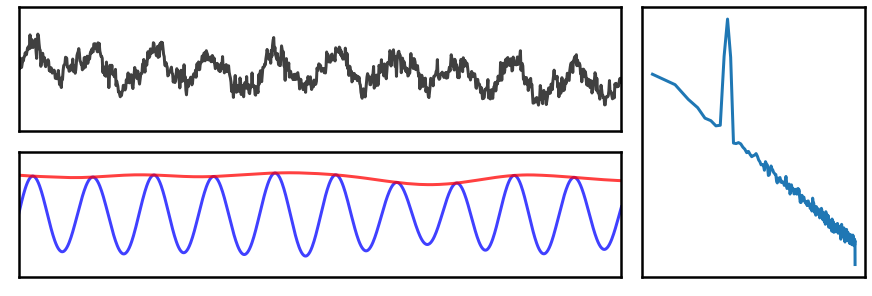

In [10]:
# Create an example panel of the visualizer
fig, ax1, ax2, ax3 = make_axes()
plot_timeseries(sig, colors='black', alpha=0.75, xlim=[1000, 2000], ax=ax1)
plot_timeseries([filted, amp], colors=['blue', 'red'], alpha=0.75, xlim=[1000, 2000], ax=ax2)
plot_spectra(freqs, powers, ax=ax3)

## BUILDER FUNCTION

In [11]:
def build_all(sig, sleep=0.01, n_build=200, save=False):
    
    ## Setup
    # yielder settings
    size = 1000
    step = 2
    start = 2000
    
    # Pre create computed signals
    filter_signal(sig, fs, 'bandpass', f_range)
    amp = amp_by_time(sig, fs, f_range)
    
    sig_yielder = yield_sig(sig, start=start, size=size, step=step)
    filt_yielder = yield_sig(filted, start=start, size=size, step=step)
    amp_yielder = yield_sig(amp, start=start, size=size, step=step)
        
    ## Create builds
    for b_ind in range(n_build):
        
        clear_output(wait=True)
        fig, ax1, ax2, ax3 = make_axes()

        plot_timeseries(next(sig_yielder), colors='black', alpha=0.75, ax=ax1)
        plot_timeseries([next(filt_yielder), next(amp_yielder)], 
                        colors=['blue', 'red'], alpha=0.75, ax=ax2) 
        
        spect_sig = sig[start + step * b_ind-2000:start + step * b_ind+2000]
        freqs, powers = trim_spectrum(*compute_spectrum(spect_sig, fs=fs), [1, 50])
        plot_spectra(freqs, powers, log_freqs=True, ax=ax3)
        
        _gif_plot_output(fig, save, b_ind, 'fig0', sleep)

## ANIMATED PLOT

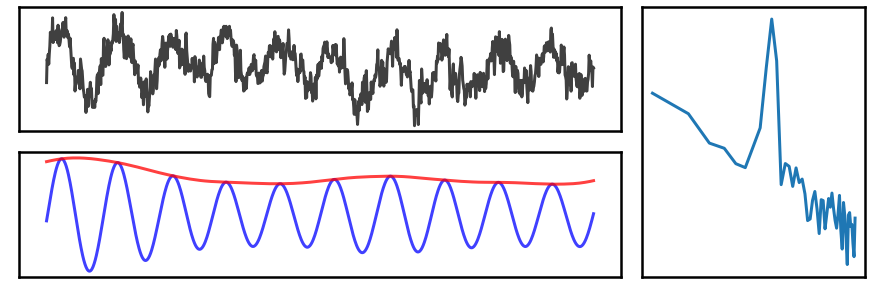

In [12]:
# Create the animated plot
build_all(sig, save=SAVE)